In [144]:
from nbimport import*   

In [145]:
%run load_data.py
# %load load_data.py

In [146]:
ld = DataLoader()
data = ld.load_data()
mab_data = ld.get_mab_data(data)
random_data = ld.get_random_data(data)
choi_data = ld.get_choi_data(data)
random_data.keys()

dict_keys(['P20-Random', 'P7-Random', 'P21-Random', 'P19-Random', 'P13-Random'])

# Training 

# Training ICF pre-test vs post-test per condition

In [147]:
mab_pretest_data = ld.get_pretest(mab_data)
mab_posttest_data = ld.get_posttest(mab_data)
avg_icf_mab_pretest,std_icf_mab_pretest = ld.icf_stats_training_test(mab_pretest_data)
avg_icf_mab_posttest,std_icf_mab_posttest = ld.icf_stats_training_test(mab_posttest_data)
random_pretest_data = ld.get_pretest(random_data)
random_posttest_data = ld.get_posttest(random_data)
avg_icf_random_pretest,std_icf_random_pretest = ld.icf_stats_training_test(random_pretest_data)
avg_icf_random_posttest,std_icf_random_posttest = ld.icf_stats_training_test(random_posttest_data)
choi_pretest_data = ld.get_pretest(choi_data)
choi_posttest_data = ld.get_posttest(choi_data)
avg_icf_choi_pretest,std_icf_choi_pretest = ld.icf_stats_training_test(choi_pretest_data)
avg_icf_choi_posttest,std_icf_choi_posttest = ld.icf_stats_training_test(choi_posttest_data)

Text(0, 0.5, 'icf')

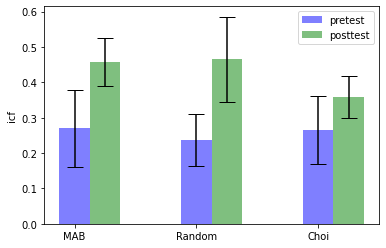

In [148]:
d = [[avg_icf_mab_pretest, avg_icf_random_pretest, avg_icf_choi_pretest],
     [avg_icf_mab_posttest, avg_icf_random_posttest, avg_icf_choi_posttest]]
x = np.arange(3)
errors = [[std_icf_mab_pretest,std_icf_random_pretest,std_icf_choi_pretest],
[std_icf_mab_posttest,std_icf_random_posttest,std_icf_choi_posttest]]
plt.bar(x + 0.00 , d[0], yerr=errors[0], align='center', alpha=0.5, color = 'b', width = 0.25, label='pretest', capsize=8)
plt.bar(x + 0.25 , d[1], yerr=errors[1], align='center', alpha=0.5, color = 'g', width = 0.25, label='posttest', capsize=8)
plt.legend()
plt.xticks(x,['MAB', 'Random', 'Choi'])
plt.ylabel('icf')

Text(0, 0.5, 'icf per block')

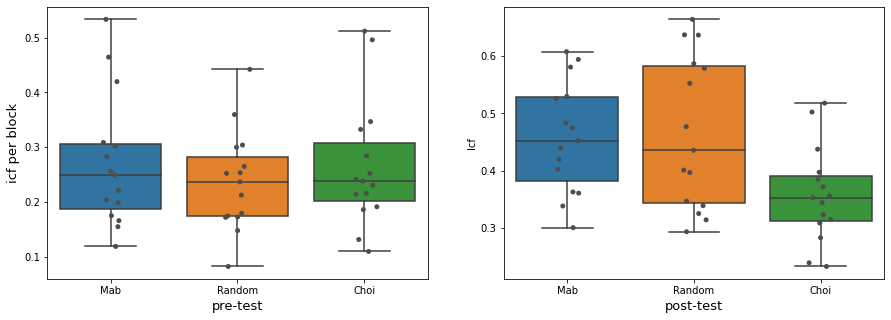

In [79]:
df_pre_mab,df_post_mab = ld.icf_per_block_training_test(mab_pretest_data,mab_posttest_data,"Mab")
df_pre_random,df_post_random = ld.icf_per_block_training_test(random_pretest_data,random_posttest_data,"Random")
df_pre_choi,df_post_choi = ld.icf_per_block_training_test(choi_pretest_data,choi_posttest_data,"Choi") 

frames_pre = [df_pre_mab, df_pre_random, df_pre_choi]
res_pre = pd.concat(frames_pre)

frames_post = [df_post_mab, df_post_random, df_post_choi]
res_post = pd.concat(frames_post)
   
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.boxplot(x ="Condition" ,y="Icf", data=res_pre, whis=np.inf, ax = ax[0])
sns.stripplot(x ="Condition" ,y="Icf", data=res_pre , color=".3", ax = ax[0])
ax[0].set_xlabel('pre-test', fontsize = 13); ax[0].set_ylabel('icf per block', fontsize = 13)

sns.boxplot(x ="Condition" ,y="Icf", data=res_post, whis=np.inf, ax = ax[1])
sns.stripplot(x ="Condition" ,y="Icf", data=res_post , color=".3", ax = ax[1])
ax[1].set_xlabel('post-test', fontsize = 13); ax[0].set_ylabel('icf per block', fontsize = 13)

# Training Jerk pre-test vs post-test per condition

In [80]:
mab = ld.get_mab_data(data)

jerk_norm_mab_pretest = ld.jerk_norm(mab,0,3,4)
jerk_norm_mab_posttest = ld.jerk_norm(mab,94,97,4)
avg_jerk_mab_pretest,std_jerk_mab_pretest = ld.jerk_stats_test(jerk_norm_mab_pretest)
avg_jerk_mab_posttest,std_jerk_mab_posttest = ld.jerk_stats_test(jerk_norm_mab_posttest)

random = ld.get_random_data(data)

jerk_norm_random_pretest = ld.jerk_norm(random,0,3,4)
jerk_norm_random_posttest = ld.jerk_norm(random,94,97,4)
avg_jerk_random_pretest,std_jerk_random_pretest = ld.jerk_stats_test(jerk_norm_random_pretest)
avg_jerk_random_posttest,std_jerk_random_posttest = ld.jerk_stats_test(jerk_norm_random_posttest)

choi = ld.get_choi_data(data)

jerk_norm_choi_pretest = ld.jerk_norm(choi,0,3,4)
jerk_norm_choi_posttest = ld.jerk_norm(choi,94,97,4)
avg_jerk_choi_pretest,std_jerk_choi_pretest = ld.jerk_stats_test(jerk_norm_choi_pretest)
avg_jerk_choi_posttest,std_jerk_choi_posttest = ld.jerk_stats_test(jerk_norm_choi_posttest)


Text(0, 0.5, 'jerk')

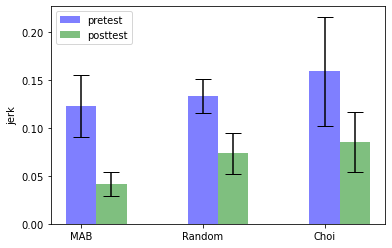

In [81]:
d = [[avg_jerk_mab_pretest, avg_jerk_random_pretest, avg_jerk_choi_pretest],
     [avg_jerk_mab_posttest, avg_jerk_random_posttest, avg_jerk_choi_posttest]]
x = np.arange(3)
errors = [[std_jerk_mab_pretest,std_jerk_random_pretest,std_jerk_choi_pretest],
[std_jerk_mab_posttest,std_jerk_random_posttest,std_jerk_choi_posttest]]
plt.bar(x + 0.00 , d[0], yerr=errors[0], align='center', alpha=0.5, color = 'b', width = 0.25, label='pretest', capsize=8)
plt.bar(x + 0.25 , d[1], yerr=errors[1], align='center', alpha=0.5, color = 'g', width = 0.25, label='posttest', capsize=8)
plt.legend()
plt.xticks(x,['MAB', 'Random', 'Choi'])
plt.ylabel('jerk')

Text(0, 0.5, 'jerk')

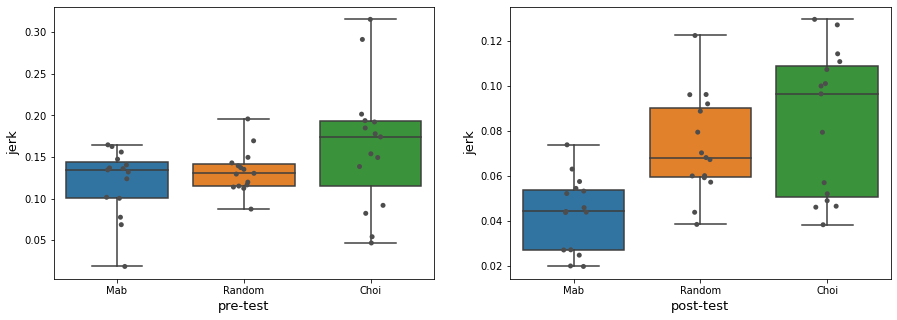

In [82]:
df_pre_mab = ld.prepare_jerk_df(mab,jerk_norm_mab_pretest,"Mab")
df_post_mab = ld.prepare_jerk_df(mab,jerk_norm_mab_posttest,"Mab")

df_pre_random = ld.prepare_jerk_df(random,jerk_norm_random_pretest,"Random")
df_post_random = ld.prepare_jerk_df(random,jerk_norm_random_posttest,"Random")

df_pre_choi = ld.prepare_jerk_df(choi,jerk_norm_choi_pretest,"Choi")
df_post_choi = ld.prepare_jerk_df(choi,jerk_norm_choi_posttest,"Choi")

frames_pre = [df_pre_mab, df_pre_random, df_pre_choi]
res_pre = pd.concat(frames_pre)

frames_post = [df_post_mab, df_post_random, df_post_choi]
res_post = pd.concat(frames_post)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.boxplot(x ="Condition" ,y="Jerk", data=res_pre, whis=np.inf, ax = ax[0])
sns.stripplot(x ="Condition" ,y="Jerk", data=res_pre , color=".3", ax = ax[0])
ax[0].set_xlabel('pre-test', fontsize = 13); ax[0].set_ylabel('jerk', fontsize = 13)

sns.boxplot(x ="Condition" ,y="Jerk", data=res_post, whis=np.inf, ax = ax[1])
sns.stripplot(x ="Condition" ,y="Jerk", data=res_post , color=".3", ax = ax[1])
ax[1].set_xlabel('post-test', fontsize = 13); ax[1].set_ylabel('jerk', fontsize = 13)


# Learning Rate

# ICF learning rate during training per condition

Text(0, 0.5, 'learning rate')

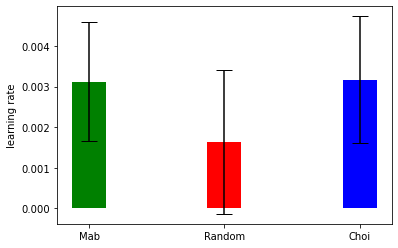

In [99]:
training_mab_data=ld.get_training(mab_data) 
st = ld.icf_stats_learning(training_mab_data) 
avg_slope = [] 
std_slope = [] 
avg_slope.append(np.mean(st)) 
std_slope.append(np.std(st)) 
x = ['Mab','Random','Choi'] 

training_random_data=ld.get_training(random_data) 
st = ld.icf_stats_learning(training_random_data) 
avg_slope.append(np.mean(st)) 
std_slope.append(np.std(st)) 

training_choi_data=ld.get_training(choi_data) 
st = ld.icf_stats_learning(training_choi_data) 
avg_slope.append(np.mean(st)) 
std_slope.append(np.std(st)) 
col = ['g','r','b'] 
plt.bar(x,avg_slope,yerr=std_slope,width=0.25,capsize=8,color=col) 
plt.ylabel('learning rate') 

# ICF learning rate per task per condition

Text(0.5, 0, 'Choi training width')

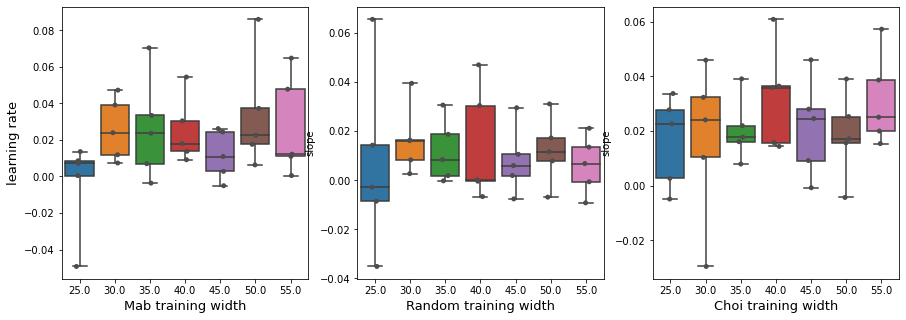

In [84]:
lst_mab_w,lst_mab_s = ld.slope_per_task(training_mab_data)
lst_random_w,lst_random_s = ld.slope_per_task(training_random_data)
lst_choi_w,lst_choi_s = ld.slope_per_task(training_choi_data)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

dt_mab = {'width': lst_mab_w, 'slope': lst_mab_s}
df_mab = pd.DataFrame.from_dict(dt_mab)
sns.boxplot(x="width", y="slope", data=df_mab, whis=np.inf,ax = ax[0])
sns.stripplot(x="width", y="slope", data=df_mab , color=".3",ax = ax[0])
ax[0].set_xlabel('Mab training width', fontsize = 13); ax[0].set_ylabel('learning rate', fontsize = 13)

dt_random = {'width': lst_random_w, 'slope': lst_random_s}
df_random = pd.DataFrame.from_dict(dt_random)
sns.boxplot(x="width", y="slope", data=df_random, whis=np.inf,ax = ax[1])
sns.stripplot(x="width", y="slope", data=df_random , color=".3",ax = ax[1])
ax[1].set_xlabel('Random training width', fontsize = 13)

dt_choi = {'width': lst_choi_w, 'slope': lst_choi_s}
df_choi = pd.DataFrame.from_dict(dt_choi)
sns.boxplot(x="width", y="slope", data=df_choi, whis=[0, 100],ax = ax[2])
sns.stripplot(x="width", y="slope", data=df_choi , color=".3",ax = ax[2])
ax[2].set_xlabel('Choi training width', fontsize = 13)


# Training ICF per participant 

0.002340552522042385
0.00013582413238351346
0.1400109401388251
0.11904127041078262
0.0024373999748042276
0.6056372807428898
0.28948333930566933
0.3699493291265833
0.5208071686520892
6.467726892595852e-08
0.1664841782087558
1.5325896191804845e-05
0.0314883608204242
0.09426193020054635
0.0005992091835571407


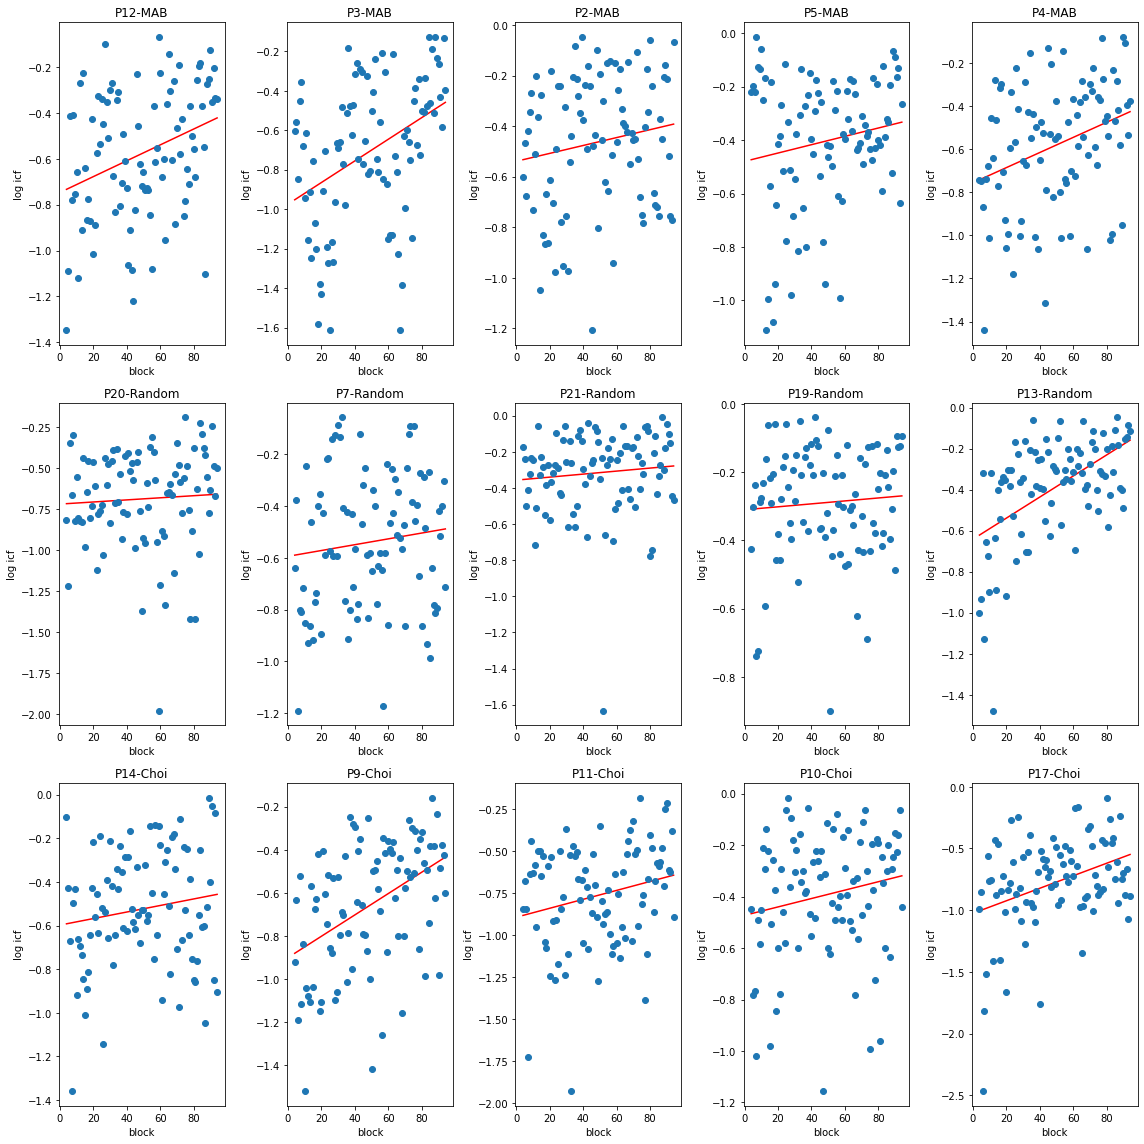

In [100]:
ld.icf_participant(training_mab_data,training_random_data,training_choi_data)

# Overall jerk per participant condition

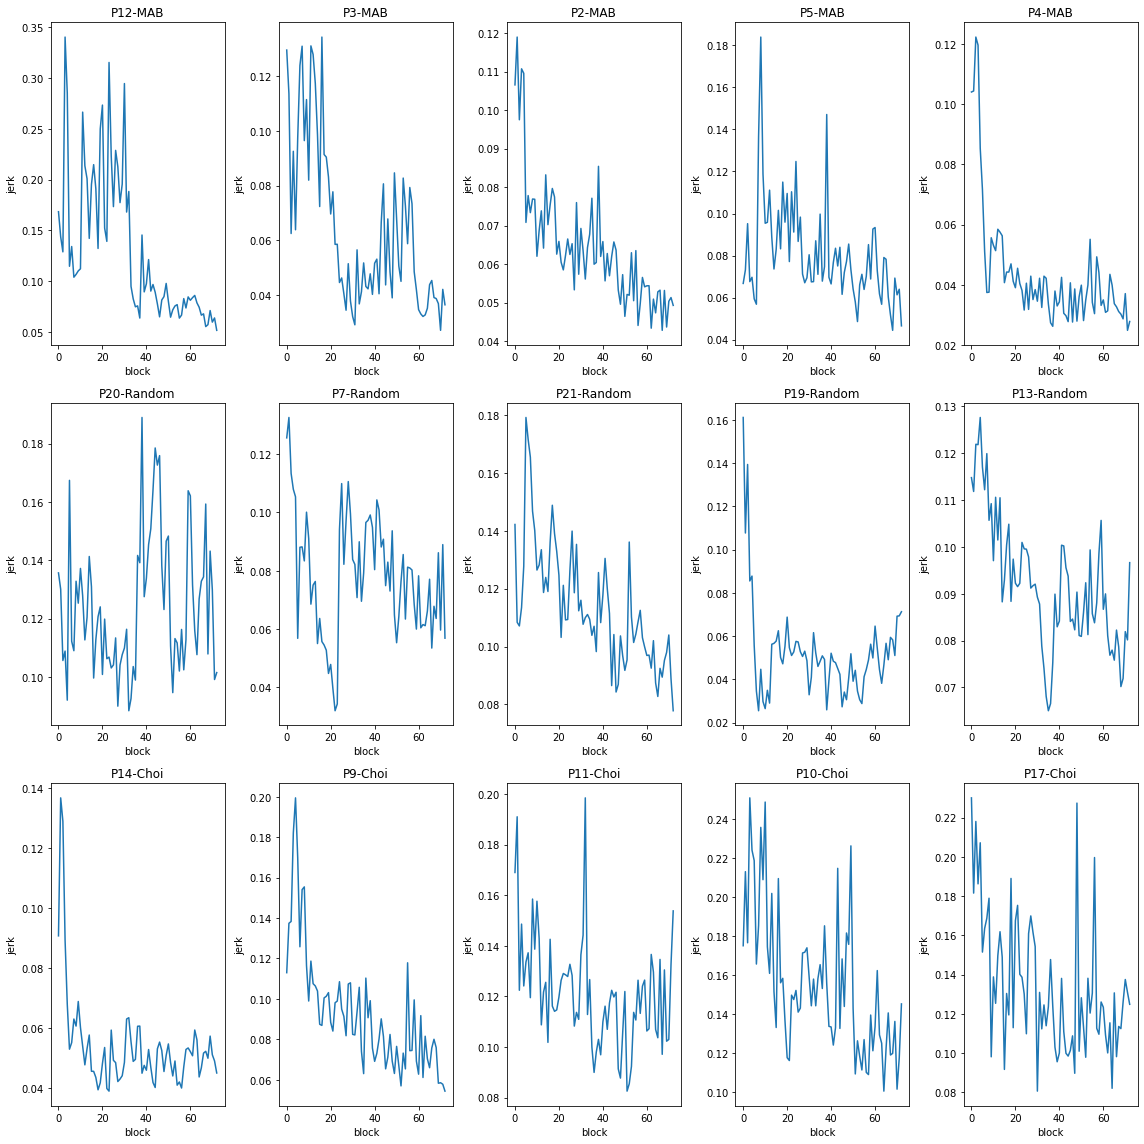

In [101]:
jerk_norm_training = ld.jerk_norm(data,3,94,4)
jerk_participant = ld.jerk_per_block(data,jerk_norm_training,4)

ld.plot_jerk(data,jerk_participant)

# Learning rate (jerk) during training per condition

[-0.0021897886466683827, -0.0005595629406265754, -0.0011919797612943363]

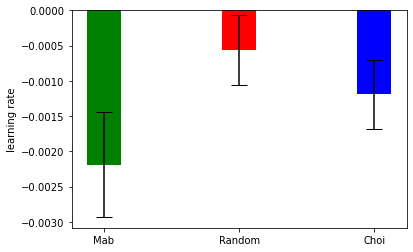

In [102]:
mab_jerk = {}
random_jerk = {}
choi_jerk = {}
for k in jerk_norm_training.keys():
    if('MAB' in k):
        mab_jerk[k] = []
        for i in jerk_norm_training[k]:
            mab_jerk[k].append(i) 
    elif('Random' in k):
        random_jerk[k] = []
        for i in jerk_norm_training[k]:
            random_jerk[k].append(i)
    else:
        choi_jerk[k] = []
        for i in jerk_norm_training[k]:
            choi_jerk[k].append(i)


avg_slope = []
std_slope = []
st = ld.jerk_stats_learning(mab_jerk) 
avg_slope.append(np.mean(st))
std_slope.append(np.std(st))
x = ['Mab','Random','Choi']
st = ld.jerk_stats_learning(random_jerk)
avg_slope.append(np.mean(st))
std_slope.append(np.std(st))
st = ld.jerk_stats_learning(choi_jerk)
avg_slope.append(np.mean(st))
std_slope.append(np.std(st))
col = ['g','r','b']
plt.bar(x,avg_slope,yerr=std_slope,width=0.25,capsize=8,color=col)
plt.ylabel('learning rate')
avg_slope

# Task distribution 

# Task distribution per participant condition

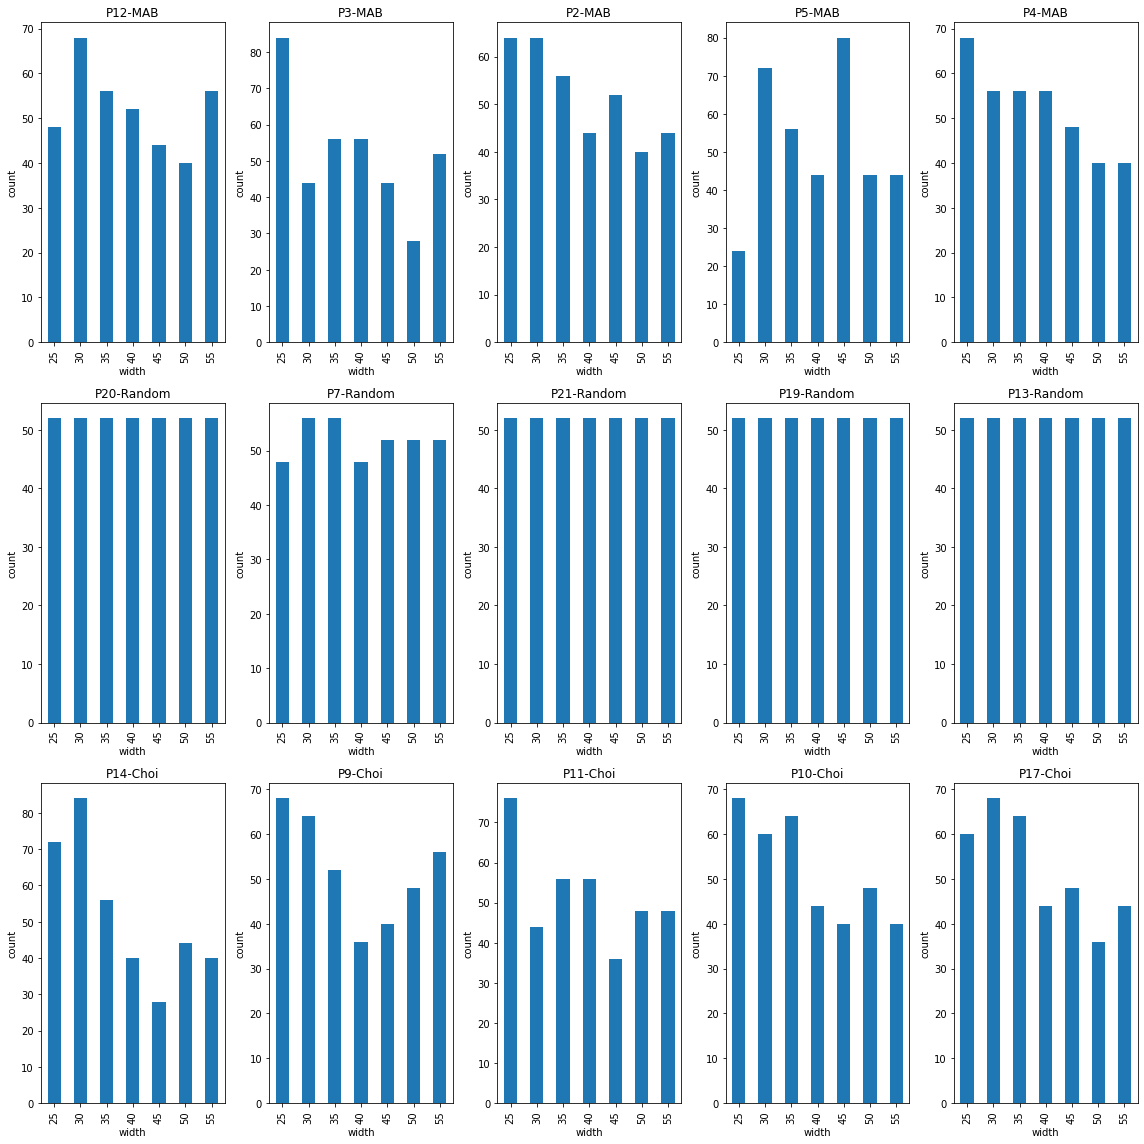

In [103]:
ld.hist_participant(training_mab_data,training_random_data,training_choi_data)

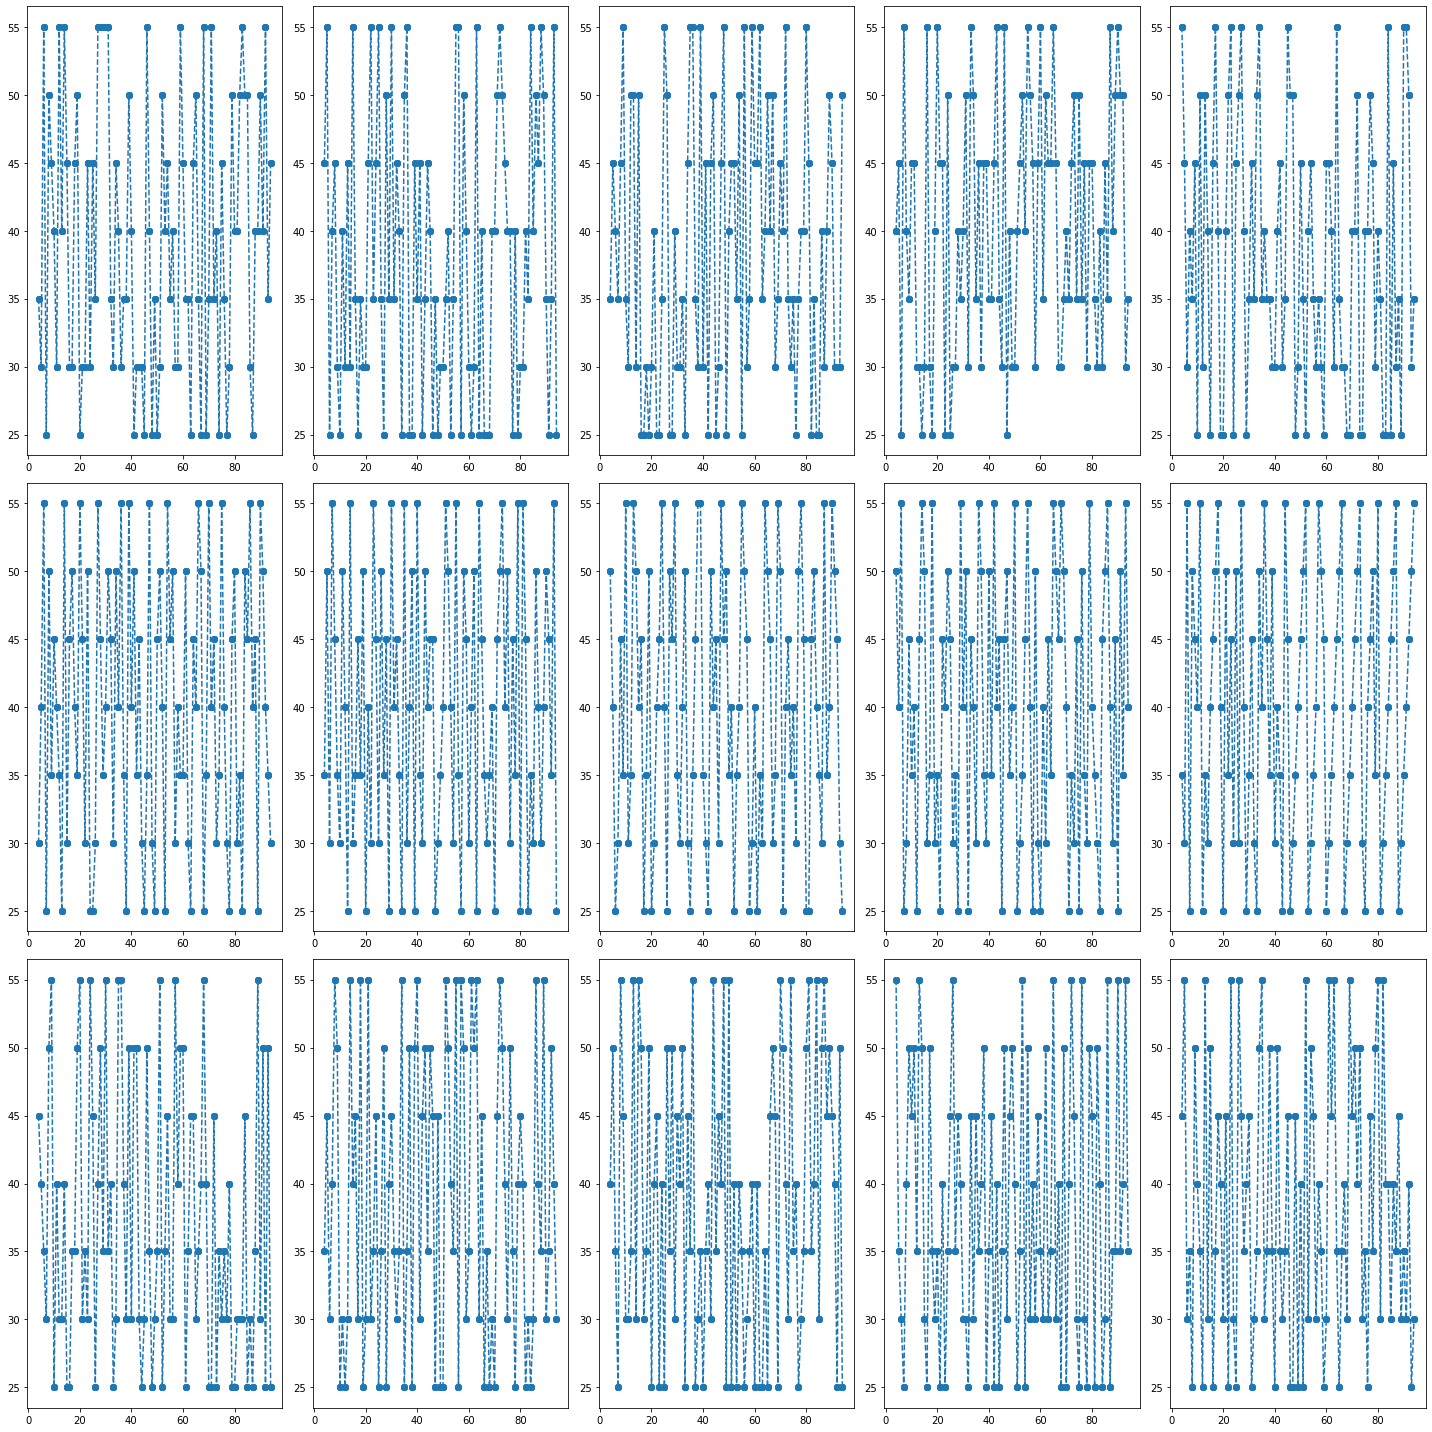

In [104]:
ld.task_distribution(training_mab_data,training_random_data,training_choi_data)


In [107]:
def compute_entropy(data):
    df_seq = {}
    for k in data.keys():
        df_width = data[k].groupby('block_id').mean()['width']
        df_seq[k] = df_width.tolist()
        for n, i in enumerate(df_seq[k]):
            if i == 25:
                df_seq[k][n] = 1
            elif i == 30:
                df_seq[k][n] = 2
            elif i == 35:
                df_seq[k][n] = 3
            elif i == 40:
                df_seq[k][n] = 4
            elif i == 45:
                df_seq[k][n] = 5
            elif i == 50:
                df_seq[k][n] = 6
            elif i == 55:
                df_seq[k][n] = 7  
    diff_participant = {}
    for k in df_seq.keys():
        diff_participant[k] = []
        for i in range(len(df_seq[k])-1):
            diff = abs(df_seq[k][i] - df_seq[k][i + 1])
            diff/=7   
            diff_participant[k].append(diff)

    from scipy.stats import entropy
    ent = {}
    for k in diff_participant.keys():
        ent[k]  = entropy(diff_participant[k], base=2)
    return ent
entropy_m = compute_entropy(training_mab_data)
entropy_r = compute_entropy(training_random_data)
entropy_c = compute_entropy(training_choi_data)

# Retention test & transfer

In [149]:
data_test = ld.load_data('../experiments/pilote/Test')
mab_data_test = ld.get_mab_data(data_test)
random_data_test = ld.get_random_data(data_test)
choi_data_test = ld.get_choi_data(data_test)


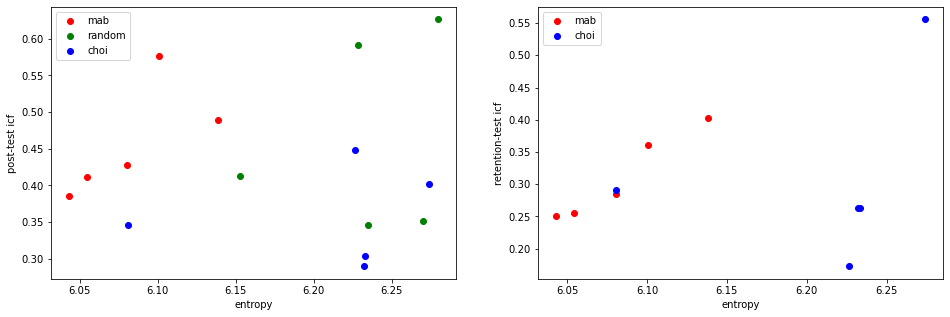

In [151]:
def mean_icf_test(data):
    icf = {}
    for k in data.keys():
        mean_icf = data[k].groupby('block_id').mean()['icf'].mean()
        icf[k] = mean_icf
    return icf
fig, ax = plt.subplots(1,2,figsize=(16,5))
icf_m = mean_icf_test(ld.get_posttest(mab_data))
icf_r = mean_icf_test(ld.get_posttest(random_data))
icf_c = mean_icf_test(ld.get_posttest(choi_data))
ax[0].plot(entropy_m.values(),icf_m.values(),'o',color = 'r',label='mab')
ax[0].plot(entropy_r.values(),icf_r.values(),'o',color = 'g',label='random')
ax[0].plot(entropy_c.values(),icf_c.values(),'o',color = 'b',label='choi')
ax[0].set_xlabel('entropy')
ax[0].set_ylabel('post-test icf')
ax[0].legend()
icf_m = mean_icf_test(ld.get_retention_data(mab_data_test))
icf_r = mean_icf_test(ld.get_retention_data(random_data_test))
icf_c = mean_icf_test(ld.get_retention_data(choi_data_test))
ax[1].plot(entropy_m.values(),icf_m.values(),'o',color = 'r',label='mab')
#ax[1].plot(entropy_r.values(),icf_r.values(),'o',color = 'g',label='random')
ax[1].plot(entropy_c.values(),icf_c.values(),'o',color = 'b',label='choi')
ax[1].set_xlabel('entropy')
ax[1].set_ylabel('retention-test icf')
ax[1].legend()

# Transfer test ICF per condition

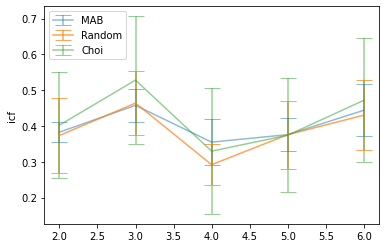

In [50]:
transfer_mab_data = ld.get_transfer_data(mab_data_test)

block_avg,block_std = ld.icf_stats_transfer(transfer_mab_data)

xval = np.arange(2, 7, 1)        
plt.errorbar(xval,block_avg.values(),yerr=block_std.values(), label= 'MAB',capsize=8,alpha=0.5)  

transfer_random_data = ld.get_transfer_data(random_data_test)

block_avg,block_std = ld.icf_stats_transfer(transfer_random_data)

plt.errorbar(xval,block_avg.values(),yerr=block_std.values(), label= 'Random',capsize=8,alpha=0.7)

transfer_choi_data = ld.get_transfer_data(choi_data_test)

block_avg,block_std = ld.icf_stats_transfer(transfer_choi_data)

plt.errorbar(xval,block_avg.values(),yerr=block_std.values(),label= 'Choi',capsize=8,alpha=0.5)

plt.ylabel('icf')
#plt.xlabel('blocks')
plt.legend()

# Transfer test jerk per condition

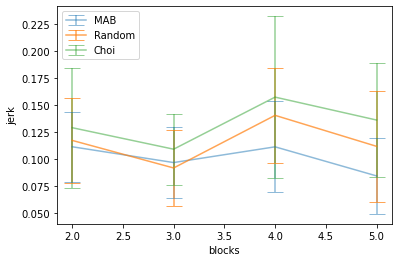

In [57]:
xval = np.arange(2, 6, 1)

jerk_norm_mab = ld.jerk_norm(mab_data_test,1,5,12)
grp_data = ld.avg_jerk_condition(mab_data_test,jerk_norm_mab,12)
mab_avg,mab_std = ld.jerk_stats_transfer(grp_data)
plt.errorbar(xval,mab_avg.values(),yerr=mab_std.values(), label= 'MAB',capsize=8,alpha=0.5)  

jerk_norm_random = ld.jerk_norm(random_data_test,1,5,12)
grp_data = ld.avg_jerk_condition(random_data_test,jerk_norm_random,12)
random_avg,random_std = ld.jerk_stats_transfer(grp_data)
plt.errorbar(xval,random_avg.values(),yerr=random_std.values(), label= 'Random',capsize=8,alpha=0.7)

jerk_norm_choi = ld.jerk_norm(choi_data_test,1,5,12)
grp_data = ld.avg_jerk_condition(choi_data_test,jerk_norm_choi,12)
choi_avg,choi_std = ld.jerk_stats_transfer(grp_data)
plt.errorbar(xval,choi_avg.values(),yerr=choi_std.values(),label= 'Choi',capsize=8,alpha=0.5)

plt.ylabel('jerk')
plt.xlabel('blocks')
plt.legend()


# ICF at Retention vs ICF at Post-test per condition

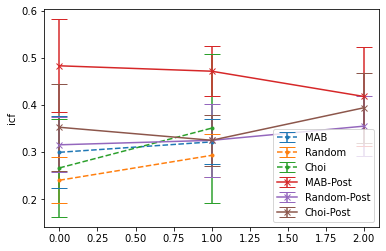

In [59]:
retention_mab_data = ld.get_retention_data(mab_data_test)
    
block_avg,block_std = ld.icf_stats_transfer(retention_mab_data)

dt = retention_mab_data.values()
iterdt = iter(dt)
first_val = next(iterdt)
num_blocks = first_val.groupby(['block_id']).mean()['icf'].shape[0]
xval = np.arange(num_blocks)        
plt.errorbar(xval,block_avg.values(),yerr=block_std.values(),fmt='.',linestyle='dashed', label= 'MAB',capsize=8)

retention_random_data = ld.get_retention_data(random_data_test)
block_avg,block_std = ld.icf_stats_transfer(retention_random_data)
plt.errorbar(xval,block_avg.values(),yerr=block_std.values(),fmt='.',linestyle='dashed', label= 'Random',capsize=8)

retention_choi_data = ld.get_retention_data(choi_data_test)
block_avg,block_std = ld.icf_stats_transfer(retention_choi_data)
plt.errorbar(xval,block_avg.values(),yerr=block_std.values(),fmt='.',linestyle='dashed', label= 'Choi',capsize=8) 

dt = mab_posttest_data.values()
iterdt = iter(dt)
first_val = next(iterdt)
num_blocks = first_val.groupby(['block_id']).mean()['icf'].shape[0]
xval = np.arange(num_blocks)
block_avg,block_std = ld.icf_stats_transfer(mab_posttest_data)
plt.errorbar(xval,block_avg.values(),yerr=block_std.values(),fmt='x',linestyle='solid',label= 'MAB-Post',capsize=8)

block_avg,block_std = ld.icf_stats_transfer(random_posttest_data)
plt.errorbar(xval,block_avg.values(),yerr=block_std.values(),fmt='x',linestyle='solid',label= 'Random-Post',capsize=8)

block_avg,block_std = ld.icf_stats_transfer(choi_posttest_data)
plt.errorbar(xval,block_avg.values(),yerr=block_std.values(),fmt='x',linestyle='solid', label= 'Choi-Post',capsize=8)

plt.ylabel('icf')
#plt.xlabel('blocks')
plt.legend()

# Jerk at Retention vs jerk at Post-test per condition

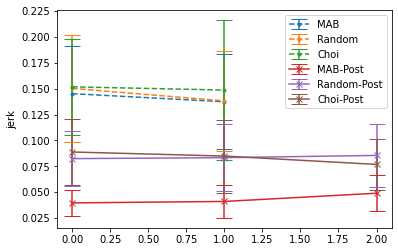

In [58]:
xval = np.arange(0, 2, 1) 
jerk_norm_mab = ld.jerk_norm(mab_data_test,-1,1,12)
grp_data = ld.avg_jerk_condition(mab_data_test,jerk_norm_mab,12)
block_avg,block_std = ld.jerk_stats_transfer(grp_data)
plt.errorbar(xval,block_avg.values(),yerr=block_std.values(),fmt='.',linestyle='dashed', label= 'MAB',capsize=8)

jerk_norm_random = ld.jerk_norm(random_data_test,-1,1,12)
grp_data = ld.avg_jerk_condition(random_data_test,jerk_norm_random,12)
block_avg,block_std = ld.jerk_stats_transfer(grp_data)
plt.errorbar(xval,block_avg.values(),yerr=block_std.values(),fmt='.',linestyle='dashed', label= 'Random',capsize=8)

jerk_norm_choi = ld.jerk_norm(choi_data_test,-1,1,12)
grp_data = ld.avg_jerk_condition(choi_data_test,jerk_norm_choi,12)
block_avg,block_std = ld.jerk_stats_transfer(grp_data)
plt.errorbar(xval,block_avg.values(),yerr=block_std.values(),fmt='.',linestyle='dashed', label= 'Choi',capsize=8) 

xval = np.arange(0, 3, 1)
jerk_norm_mab_post = ld.jerk_norm(mab_data,94,97,4)
grp_data = ld.avg_jerk_condition(mab_data,jerk_norm_mab_post,4)
block_avg,block_std = ld.jerk_stats_transfer(grp_data)
plt.errorbar(xval,block_avg.values(),yerr=block_std.values(),fmt='x',linestyle='solid',label= 'MAB-Post',capsize=8)

jerk_norm_random_post = ld.jerk_norm(random_data,94,97,4)
grp_data = ld.avg_jerk_condition(random_data,jerk_norm_random_post,4)
block_avg,block_std = ld.jerk_stats_transfer(grp_data)
plt.errorbar(xval,block_avg.values(),yerr=block_std.values(),fmt='x',linestyle='solid',label= 'Random-Post',capsize=8)

jerk_norm_choi_post = ld.jerk_norm(choi_data,94,97,4)
grp_data = ld.avg_jerk_condition(choi_data,jerk_norm_choi_post,4)
block_avg,block_std = ld.jerk_stats_transfer(grp_data)
plt.errorbar(xval,block_avg.values(),yerr=block_std.values(),fmt='x',linestyle='solid', label= 'Choi-Post',capsize=8)

plt.ylabel('jerk')
#plt.xlabel('blocks')
plt.legend()

In [62]:
def concat_lists(len_mab,len_random,len_choi,num):
    lsts = []
    for i in range(num):
        lbl_mab = np.full(len_mab,"MAB-"+str(i+1))
        lbl_rd = np.full(len_random,"Random-"+str(i+1))
        lbl_ch = np.full(len_choi,"Choi-"+str(i+1))
        lsts.append(lbl_mab)
        lsts.append(lbl_rd)
        lsts.append(lbl_ch)
    for lst in lsts:
        blks = np.concatenate((lsts))
    return blks

# ICF per block per condition at retention

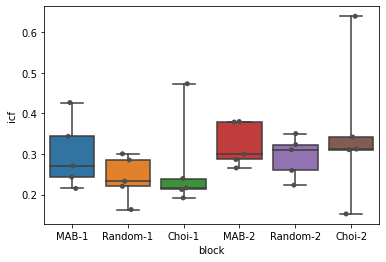

In [63]:
merged_mab = ld.icf_per_block_condition(retention_mab_data)
merged_random = ld.icf_per_block_condition(retention_random_data)
merged_choi = ld.icf_per_block_condition(retention_choi_data)
merged_lst = []
for i in merged_mab.keys():
    merged_lst += merged_mab[i]
    merged_lst += merged_random[i]
    merged_lst += merged_choi[i]
blks = concat_lists(len(transfer_mab_data.keys()),len(transfer_random_data.keys()),len(transfer_choi_data.keys()),2)

dt_ = {'block':blks , 'icf':merged_lst}
df_ = pd.DataFrame.from_dict(dt_)

ax = sns.boxplot(x ="block" ,y="icf", data=df_, whis=[0, 100])
ax = sns.stripplot(x ="block" ,y="icf", data=df_, color=".3")

# ICF per block per condition at transfer

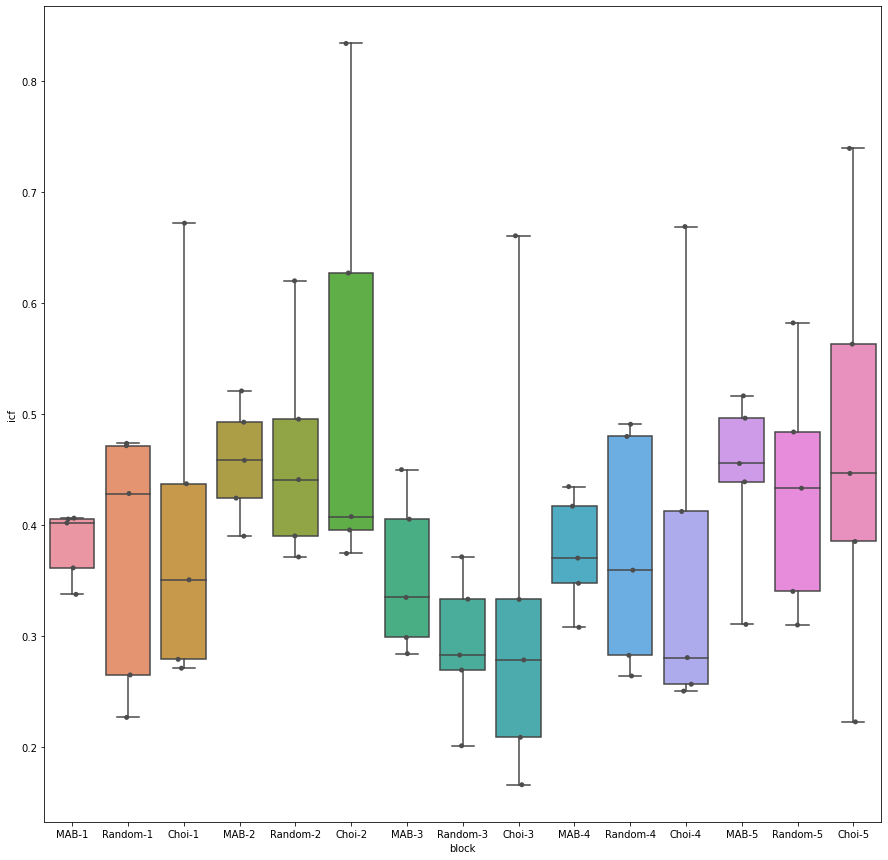

In [64]:
merged_mab = ld.icf_per_block_condition(transfer_mab_data)
merged_random = ld.icf_per_block_condition(transfer_random_data)
merged_choi = ld.icf_per_block_condition(transfer_choi_data)
merged_lst = []
for i in merged_mab.keys():
    merged_lst += merged_mab[i]
    merged_lst += merged_random[i]
    merged_lst += merged_choi[i]

blks = concat_lists(len(transfer_mab_data.keys()),len(transfer_random_data.keys()),len(transfer_choi_data.keys()),5)

dt_ = {'block':blks , 'icf':merged_lst}
df_ = pd.DataFrame.from_dict(dt_)
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.boxplot(x ="block" ,y="icf", data=df_, whis=[0, 100])
ax = sns.stripplot(x ="block" ,y="icf", data=df_, color=".3")

In [65]:
from scipy.stats import entropy
# discrete probabilities
p = [1/7, 1/7, 1/7, 1/7, 1/7, 1/7,1/7]
# calculate entropy
e = entropy(p, base=2)
# print the result
print('entropy: %.3f bits' % e)

entropy: 2.807 bits


# Questionnaires

In [85]:
#arr = os.listdir()
#print(arr)
df = pd.read_csv('Motor learning questionnaire 1  (Responses) - Form responses 1.csv')
df2 = pd.read_csv('Motor learning questionnaire 2 (Responses) - Form responses 1.csv')
column_names = {
                'Timestamp': 'timestamp',
                'What is your age group?': 'age',
                'What is your dominant hand?': 'dominant-hand',
                'What is your gender?': 'gender',
                'What is your occupation?': 'occupation',
                'Do you have any injuries that restrict your hand movement?': 'injuries',
                'Can you tell among these, what type of schedule was presented during the experiment?':'schedule-type',
                'How did you feel during the task?': 'feeling'
               }
df.rename(columns=column_names, inplace=True)

# Experience

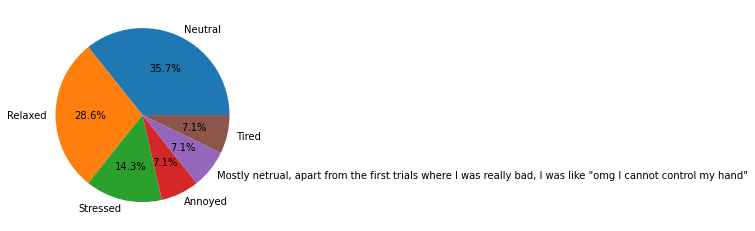

In [38]:
f = df["feeling"].value_counts()
p=plt.pie(x=f,autopct="%.1f%%",labels=f.keys())

# Participant guess of schedule type

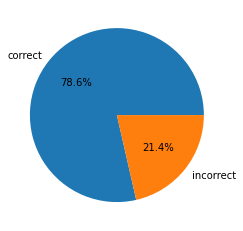

In [61]:
import re
guess_schedule = df["schedule-type"].tolist()
real_schedule=df["schedule"].tolist()
j=0
response=[]
for i in guess_schedule:
    if(re.search(real_schedule[j],i, re.IGNORECASE)):
        response.append('correct')
    else:
        response.append('incorrect')
    j+=1
df["response"]=response
sch = df["response"].value_counts()
guess = plt.pie(x=sch,autopct="%.1f%%",labels=sch.keys())


In [86]:
column_names = {
                'Timestamp': 'timestamp',
                'How much do you think you were good at this activity before training?': 'post-performance',
                'Do you feel that the training schedule was appropriate for the task you had to learn?': 'training-appropriateness',
                'How much do you think you’ve learnt the movement?': 'movement-learnt',
                'In general, what do you think about using a machine to help you acquire movement skills?': 'machine-use'     
               }
df2.rename(columns=column_names, inplace=True)

# Performance before training

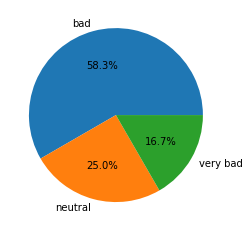

In [93]:
pp = df2["post-performance"].value_counts()
k = []
options = {
           1 : 'very bad',
           2 : 'bad',
           3 : 'neutral',
           4 : 'good',
           5 : 'very good',
           }
for i in pp.keys():
    k.append(options[i])
perf = plt.pie(x=pp,autopct="%.1f%%",labels=k)



# How appropriate was training?

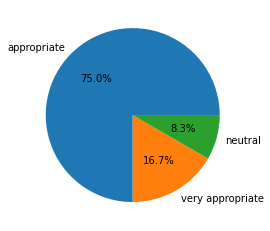

In [94]:
pp = df2["training-appropriateness"].value_counts()
k = []
options = {
           1 : 'Not appropriate',
           2 : 'mostly inappropriate',
           3 : 'neutral',
           4 : 'appropriate',
           5 : 'very appropriate',
           }
for i in pp.keys():
    k.append(options[i])
perf = plt.pie(x=pp,autopct="%.1f%%",labels=k)


# How much was movement  learnt?

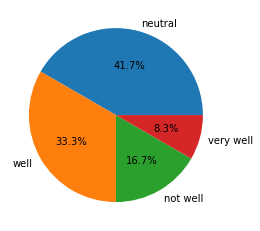

In [96]:
pp = df2["movement-learnt"].value_counts()
k = []
options = {
           1 : 'Not at all',
           2 : 'not well',
           3 : 'neutral',
           4 : 'well',
           5 : 'very well',
           }
for i in pp.keys():
    k.append(options[i])
perf = plt.pie(x=pp,autopct="%.1f%%",labels=k)

# Machine use for training

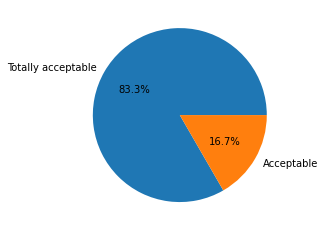

In [97]:
pp = df2["machine-use"].value_counts()
perf = plt.pie(x=pp,autopct="%.1f%%",labels=pp.keys())